## Name: HeeSeung Park
### Apply the scikit laern random forest classifier code to the Iris dataset using all three categories and all four feature at once.
### -Use decision trees of depth one, two, and three as your base classifiers.
### -Vary the number of trees in your random forests (i.e., vary the number of bootstrap samples).
### -Summarize in a table how good a job the random forest do (using the out-of-bag score) in classifying the data for each combination of base classifier tree depth and forest size.

In [37]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 
import numpy as np
import graphviz
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import datasets

# Loading the IRIS dataset
iris = datasets.load_iris()
y = iris.target
features = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]

## We will try 0, 25, 50, 75, 100 number of trees in our random forests with different depth of trees (1,2,3)

Entropy
Max Depth, Training, Test, # of Trees
1 0.247619047619 0.311111111111
2 0.0380952380952 0.0888888888889
3 0.0285714285714 0.0222222222222
Max Depth, Training, Test, # of Trees
1 0.0380952380952 0.0444444444444
2 0.0285714285714 0.0666666666667
3 0.0285714285714 0.0222222222222
Max Depth, Training, Test, # of Trees
1 0.304761904762 0.4
2 0.0285714285714 0.0444444444444
3 0.0285714285714 0.0444444444444
Max Depth, Training, Test, # of Trees
1 0.304761904762 0.4
2 0.0380952380952 0.0444444444444
3 0.0285714285714 0.0222222222222
Max Depth, Training, Test, # of Trees
1 0.133333333333 0.266666666667
2 0.0380952380952 0.0222222222222
3 0.0190476190476 0.0444444444444
Max Depth, Training, Test, # of Trees
1 0.304761904762 0.4
2 0.0380952380952 0.0444444444444
3 0.0285714285714 0.0222222222222
Max Depth, Training, Test, # of Trees
1 0.304761904762 0.4
2 0.0285714285714 0.0444444444444
3 0.0285714285714 0.0222222222222
Max Depth, Training, Test, # of Trees
1 0.304761904762 0.4
2 0.02857

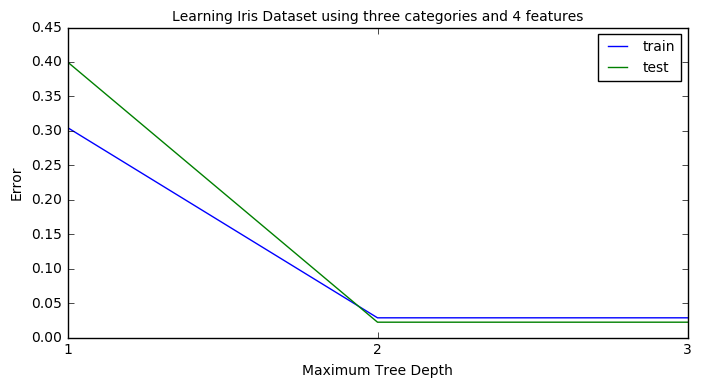

In [42]:
X = iris.data[:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

MaxDepth = 3
Errors = np.zeros((MaxDepth, 2))

nEstimator = np.arange(10,100,10)
nEstimator

forest_entropy_record = []

print("Entropy")
for i in range(0,len(nEstimator)):
    print('Max Depth, Training, Test, # of Trees')
    for j in range(0, MaxDepth):    
        forest = RandomForestClassifier(n_estimators=nEstimator[i], max_depth=j+1, criterion='entropy')
        forest.fit(X_train, y_train)

        X_combined = np.vstack((X_train, X_test))
        y_combined = np.hstack((y_train, y_test))

        Errors[j,0] = 1 - forest.score(X_train,y_train)
        Errors[j,1] = 1 - forest.score(X_test,y_test)
        print(j+1,Errors[j,0],Errors[j,1])
        forest_entropy_record.append(["Entropy", j+1, nEstimator[i] ,Errors[j,0], Errors[j,1]])
 
# plot errors by tree depth     
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning Iris Dataset using three categories and 4 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show()

Gini
Max Depth, Training, Test, # of Trees
1 0.0666666666667 0.111111111111
2 0.0380952380952 0.0888888888889
3 0.0285714285714 0.0222222222222
Max Depth, Training, Test, # of Trees
1 0.0761904761905 0.177777777778
2 0.0285714285714 0.0444444444444
3 0.0285714285714 0.0222222222222
Max Depth, Training, Test, # of Trees
1 0.0571428571429 0.0444444444444
2 0.0380952380952 0.0222222222222
3 0.0285714285714 0.0888888888889
Max Depth, Training, Test, # of Trees
1 0.047619047619 0.0222222222222
2 0.0285714285714 0.0222222222222
3 0.0380952380952 0.0444444444444
Max Depth, Training, Test, # of Trees
1 0.0571428571429 0.0444444444444
2 0.0285714285714 0.0222222222222
3 0.0190476190476 0.0222222222222
Max Depth, Training, Test, # of Trees
1 0.161904761905 0.311111111111
2 0.0285714285714 0.0222222222222
3 0.0285714285714 0.0222222222222
Max Depth, Training, Test, # of Trees
1 0.27619047619 0.355555555556
2 0.0285714285714 0.0444444444444
3 0.0285714285714 0.0222222222222
Max Depth, Training, Te

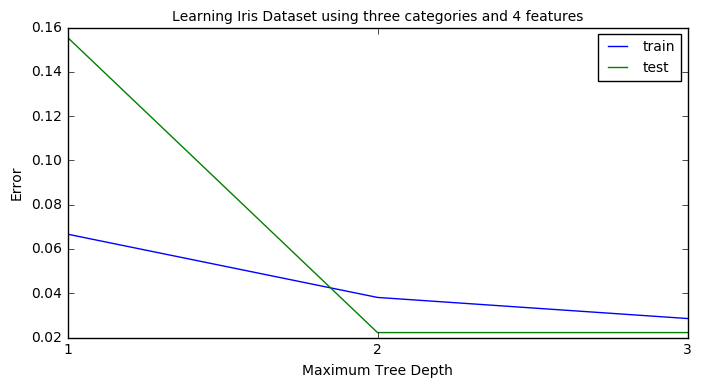

In [44]:
X = iris.data[:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

MaxDepth = 3
Errors = np.zeros((MaxDepth, 2))

nEstimator = np.arange(10,100,10)
nEstimator

forest_gini_record = []

print("Gini")
for i in range(0,len(nEstimator)):
    print('Max Depth, Training, Test, # of Trees')
    for j in range(0, MaxDepth):    
        forest = RandomForestClassifier(n_estimators=nEstimator[i], max_depth=j+1, criterion='gini')
        forest.fit(X_train, y_train)

        X_combined = np.vstack((X_train, X_test))
        y_combined = np.hstack((y_train, y_test))

        Errors[j,0] = 1 - forest.score(X_train,y_train)
        Errors[j,1] = 1 - forest.score(X_test,y_test)
        print(j+1,Errors[j,0],Errors[j,1])
        forest_gini_record.append(["Gini", j+1, nEstimator[i] ,Errors[j,0], Errors[j,1]])
 
# plot errors by tree depth     
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning Iris Dataset using three categories and 4 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show()

In [45]:
from tabulate import tabulate

result_record = forest_entropy_record + forest_gini_record
print(tabulate(result_record, headers=["Criterion", "Max Depth", "Number of Trees", "Training Error", "Test Error"]))

Criterion      Max Depth    Number of Trees    Training Error    Test Error
-----------  -----------  -----------------  ----------------  ------------
Entropy                1                 10         0.247619      0.311111
Entropy                2                 10         0.0380952     0.0888889
Entropy                3                 10         0.0285714     0.0222222
Entropy                1                 20         0.0380952     0.0444444
Entropy                2                 20         0.0285714     0.0666667
Entropy                3                 20         0.0285714     0.0222222
Entropy                1                 30         0.304762      0.4
Entropy                2                 30         0.0285714     0.0444444
Entropy                3                 30         0.0285714     0.0444444
Entropy                1                 40         0.304762      0.4
Entropy                2                 40         0.0380952     0.0444444
Entropy                3 